<a href="https://colab.research.google.com/github/gantir/YoloV3/blob/master/notebooks/s13_yolo_drone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gantir/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 2237, done.
remote: Total 2237 (delta 0), reused 0 (delta 0), pack-reused 2237
Receiving objects: 100% (2237/2237), 100.35 MiB | 35.27 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [0]:
!git pull origin master

remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/gantir/YoloV3
 * branch            master     -> FETCH_HEAD
   b48e749..e46bc99  master     -> origin/master
Updating b48e749..e46bc99
Fast-forward
 cfg/yolov3-drone.cfg | 821 +++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 821 insertions(+)
 create mode 100644 cfg/yolov3-drone.cfg


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [0]:
ls

gdrive/  sample_data/  YoloV3/


In [0]:
cd YoloV3/

/content/YoloV3


In [0]:
!mkdir /content/YoloV3/weights
!cp "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/yolo_object_detection/models/yolov3-spp-ultralytics.pt" /content/YoloV3/weights/

In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 14:18:28.401863: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4729.44it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 102.78it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00,

In [0]:
!python train.py --data data/dronedata/drone.data --batch 10 --cache --cfg cfg/yolov3-drone.cfg --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-drone.cfg', data='data/dronedata/drone.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 14:21:23.544794: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (468 found, 0 missing, 0 empty, 0 duplicate, for 468 images): 100% 468/468 [00:00<00:00, 6426.28it/s]
Caching images (0.2GB):  77% 360/468 [00:06<00:02, 45.65it/s]libpng warning: iCCP: known incorrect sRGB profile
Caching images (0.3GB):  96% 451/468 [00:07

In [0]:
!python train.py --data data/dronedata/drone.data --batch 10 --cache --cfg cfg/yolov3-drone.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-drone.cfg', data='data/dronedata/drone.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 14:31:29.147820: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (468 found, 0 missing, 0 empty, 0 duplicate, for 468 images): 100% 468/468 [00:00<00:00, 6477.11it/s]
Caching images (0.2GB):  77% 361/468 [00:06<00:02, 45.92it/s]libpng warning: iCCP: known incorrect sRGB profile
Caching images (0.3GB):  97% 452/468 [00:

In [0]:
# !cp  weights/last.pt "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/yolo_object_detection/models/yolov3-drones.pt"
"/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/box-images"

In [0]:
!python detect.py --conf-thres 0.1 --names="data/dronedata/drone.names" --source="data/dronedata/images/" --cfg="cfg/yolov3-drone.cfg" --weights="/content/gdrive/My Drive/Colab Notebooks/EVA4/data/yolo_object_detection/models/yolov3-drones.pt" --output "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/box-images"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-drone.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/dronedata/drone.names', output='/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/box-images', save_txt=False, source='data/dronedata/images/', view_img=False, weights='/content/gdrive/My Drive/Colab Notebooks/EVA4/data/yolo_object_detection/models/yolov3-drones.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/519 data/dronedata/images/0001.jpg: 256x512 6 drones, Done. (0.019s)
image 2/519 data/dronedata/images/0003.jpg: 384x512 1 drones, Done. (0.020s)
image 3/519 data/dronedata/images/0004.jpg: 384x512 1 drones, Done. (0.018s)
image 4/519 data/dronedata/images/0005.jpg: 384x512 1 drones, Done. (0.021s)
image 5/519 data/dronedata/images/0006.jpg: 384x512 1 drones,

In [0]:
!ffmpeg -i "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/src/drone-eagle.mp4" "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/images/drone-eagle/image-%04d.png"


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!python detect.py --conf-thres 0.1 --names="data/dronedata/drone.names" --source "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/images/drone-eagle/" --output "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/box-images/drone-eagle/"


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/dronedata/drone.names', output='/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/box-images/drone-eagle/', save_txt=False, source='/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/images/drone-eagle/', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1375 /content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/images/drone-eagle/image-0001.png: 320x512 Done. (0.020s)
image 2/1375 /content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/images/drone-eagle/image-0002.png: 320x512 Done. (0.017s)
image 3/1375 /content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yol

In [0]:
!ffmpeg -r 25 -i "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/box-images/drone-eagle/image-%04d.png" -c:v libx264 -vf fps=25 -pix_fmt yuv420p "/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/videos/box-src/drone-eagle.mp4"


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

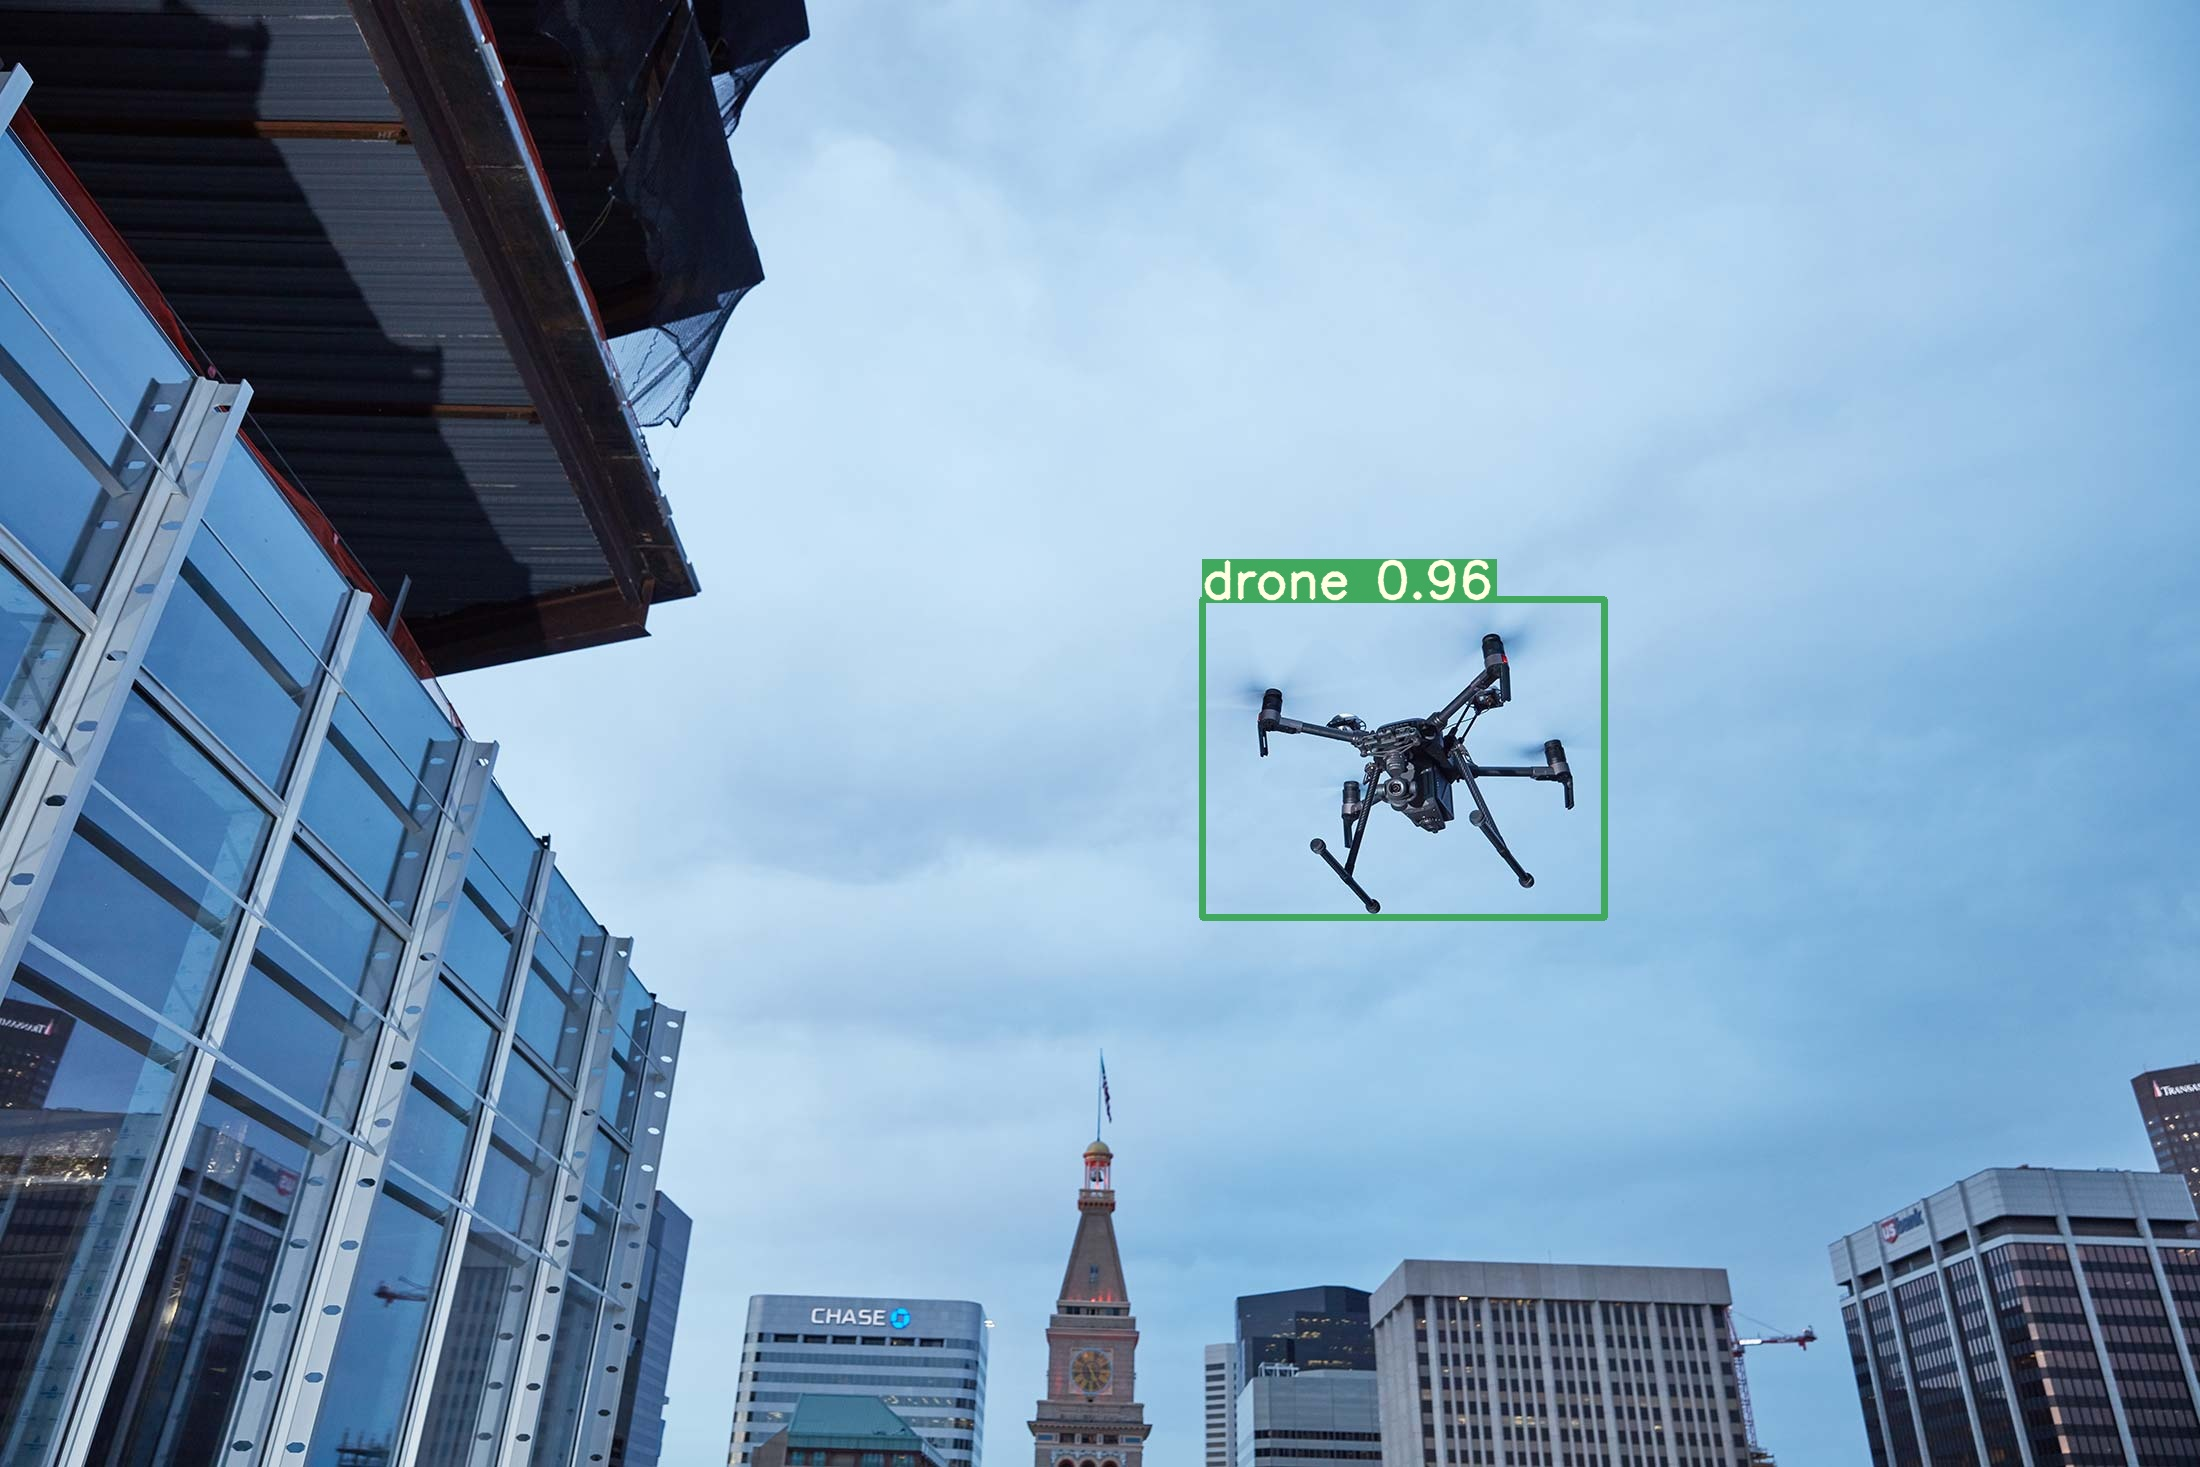

In [0]:
Image(filename='/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/box-images/0006.jpg', width=600)

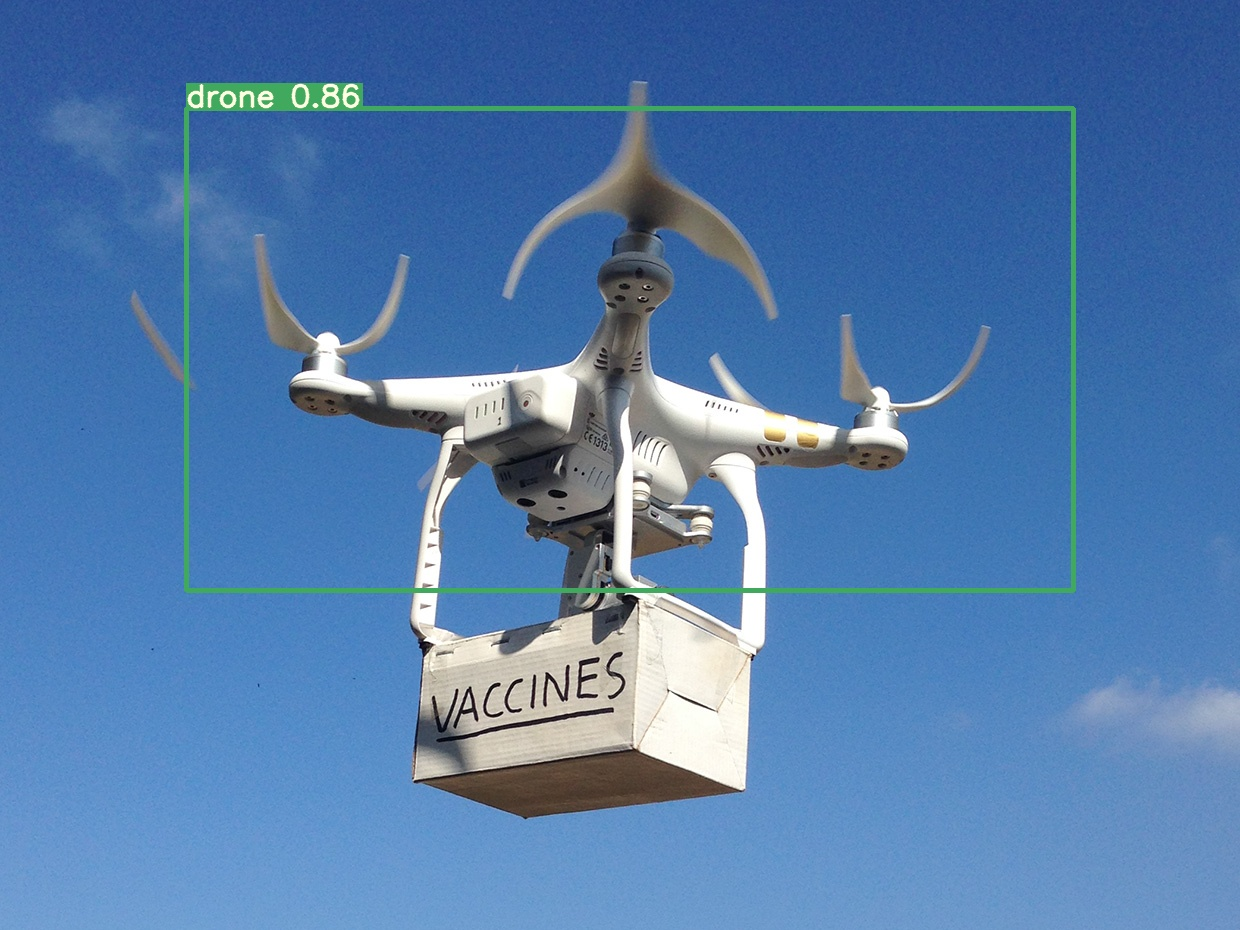

In [0]:
Image(filename='/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/box-images/0016.jpg', width=600)

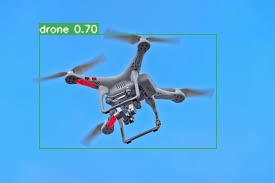

In [0]:
Image(filename='/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/box-images/0026.jpg', width=600)

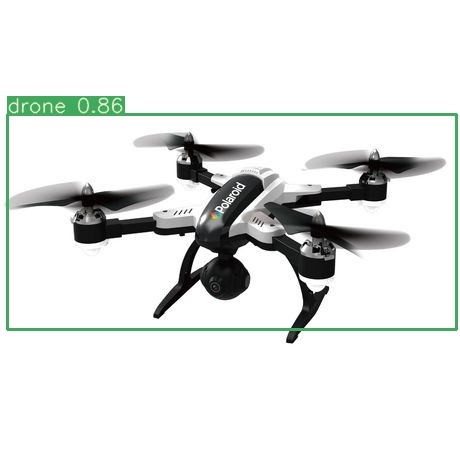

In [0]:
Image(filename='/content/gdrive/My Drive/Colab Notebooks/EVA4/data/drones-yolov3/box-images/pic_206.jpg', width=600)